In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nnfs.datasets import spiral_data
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
X, y = spiral_data(1000, classes=2)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    random_state=43
)


print(f'X_train{X_train.shape}')
print(f'X_test{X_test.shape}')
print(f'y_train{y_train.shape}')
print(f'y_test{y_test.shape}')
print(f'X{X.shape}')
print(f'y{y.shape}')

X_train(1600, 2)
X_test(400, 2)
y_train(1600,)
y_test(400,)
X(2000, 2)
y(2000,)


In [3]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

# membuat callbacks
lr_rate_schedular = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    callbacks=[lr_rate_schedular]
)

Epoch 1/50


2022-09-11 07:48:51.914873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-11 07:48:51.914922: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-11 07:48:51.914954: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anggads01): /proc/driver/nvidia/version does not exist
2022-09-11 07:48:51.915337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


50/50 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4919 - lr: 1.0000e-04
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5706 - lr: 1.2589e-04
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5506 - lr: 1.4125e-04
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5975 - lr: 1.5849e-04
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.6156 - lr: 1.7783e-04
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.6181 - lr: 1.9953e-04
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6231 - lr: 2.2387e-04
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 

<AxesSubplot:>

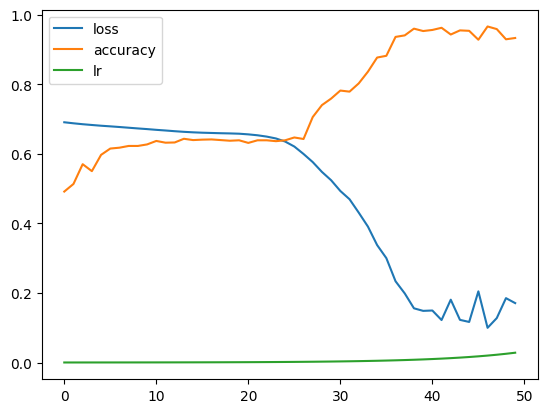

In [4]:
pd.DataFrame(history.history).plot()

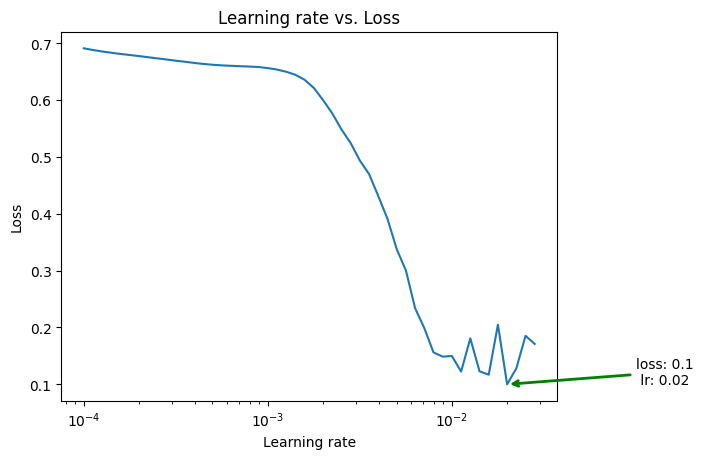

In [5]:
# Tuning lr ideally

lrs =  1e-4 * (10**(tf.range(50) / 20))
loss = np.array(history.history['loss'])

history_lr = pd.DataFrame(np.c_[lrs, np.array(history.history['loss'])])
x_lr, y_loss = history_lr.iloc[np.argmin(loss), :] 

plt.semilogx(lrs, loss)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

plt.annotate(
    f"loss: {round(y_loss, 2)}\n lr: {round(x_lr, 3)}", 
    xy=(x_lr, y_loss), 
    xytext=(y_loss, y_loss), 
    arrowprops=dict(arrowstyle="->", 
    color="green", 
    lw=2,
   )
)

plt.show()


## Melatih dan mengevaluasi model dengan learning rate yang ideal

In [8]:
model_2 = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    X_train, 
    y_train, 
    epochs=20,
)

Epoch 1/20
50/50 [==============================] - 1s 2ms/step - loss: 0.6779 - accuracy: 0.5725
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6162
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6219
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6237
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.6406
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7031
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7606
Epoch 8/20
50/50 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8425
Epoch 9/20
50/50 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.9038
Epoch 10/20
50/50 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9250
Epoch 11/20
50/50 [